# ASHWIN SURESH (21MIS1174)

# First we will load the file to the variable filepath and supress any kind of warnings that pop up

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
# Loading File
filepath ='C:/Users/Administrator/OneDrive/Desktop/SEM-6/SWE4012/Lab Files/SUV.csv'

# Using pandas library it enables us to read the csv file and store as a dataframe

In [2]:
data=pd.read_csv(filepath)

# Displaying first 5 records of the dataframe 

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.drop(['User ID'], axis=1)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


# To check whether there are any null or empty values in the dataset, since none we proceed further without disturbing the dataset

In [5]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# To verify the datatypes of the dataset, as only numerical values shall be used

In [6]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

# As per the dataset USER ID is not deemed to be set as features as it has unique values.. So it is better to drop them from the dataframe and convert values of GENDER to ordinal form

In [7]:
# Drop additional columns
columns_to_drop = ['User ID']
x_selected = data.drop(columns=columns_to_drop, axis=1)
x_selected['Gender'].replace({'Male': 0, 'Female': 1}, inplace = True)
x_selected

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


# It is advisable to first find the correlation between features and target.. Higher the correlation coefficient better the Linear Regression analysis

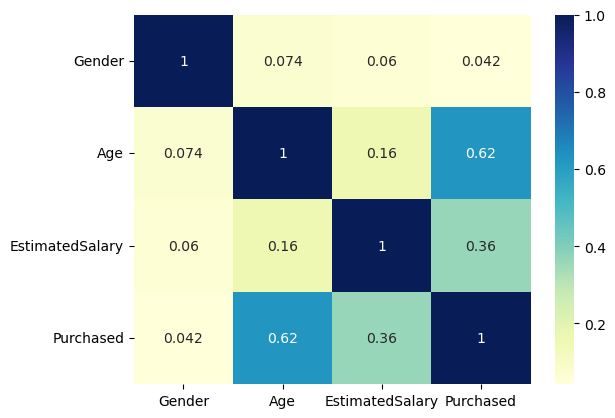

In [8]:
# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

sns.heatmap(x_selected.corr(), cmap="YlGnBu", annot=True)
plt.show()

# Using the scatter plot between AGE and PURCHASE to check whether Logistic Regression is feasible.. AGE and PURCHASE have a correlation of 62 %

<Axes: xlabel='Age', ylabel='Purchased'>

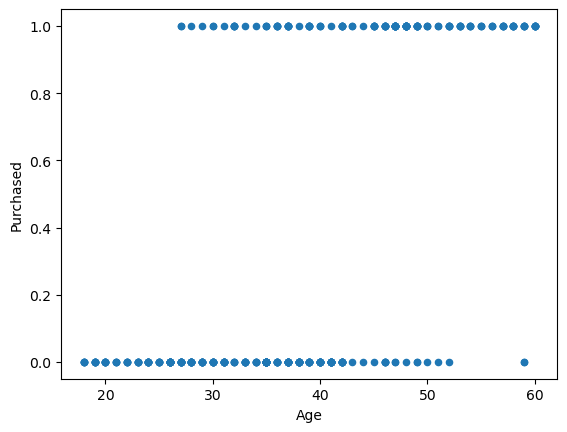

In [9]:
# Visualise the relationship between the features and the response using scatterplots
data.plot(x='Age',y='Purchased',kind='scatter')

# Here 'x' represents the independent variable (feature) and 'y' represents the dependent variable (target)

In [10]:
x = data['Age']
y = data['Purchased']

# Since only one feature is being used so the size has to be increased by one more dimension using 'reshape'

In [11]:
# Convert 1D array to 2D array
x = x.values.reshape(-1, 1)

In [12]:
x.shape

(400, 1)

# Here we start splitting the dataset into training and testing using sklearn library and we split in that ratio of 85:15 where 85 represents training set and 15 testing/validating set

In [13]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size = 0.15, random_state = 0)  

# To check the dimensions of each training and testing set

In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(340, 1)
(340,)
(60, 1)
(60,)


# Importing LogisticRegression from 'sklearn' library and using the object to train the model on training set

In [15]:
# import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# Representing LogisticRegression as lr(Creating LogisticRegression Object)
lr = LogisticRegression()

# Fit the model using lr.fit()
lr.fit(x_train, y_train)

LogisticRegression()

# Predict which class x_test values fall in

In [16]:
y_pred = lr.predict(x_test)
lr.predict(x_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

# Predict the probability of x_test values falling in either Class '0' or '1'

In [17]:
lr.predict_proba(x_test)

array([[0.89624545, 0.10375455],
       [0.68512565, 0.31487435],
       [0.78490159, 0.21509841],
       [0.89624545, 0.10375455],
       [0.78490159, 0.21509841],
       [0.93542783, 0.06457217],
       [0.87909008, 0.12090992],
       [0.75438137, 0.24561863],
       [0.98557586, 0.01442414],
       [0.31568491, 0.68431509],
       [0.89624545, 0.10375455],
       [0.92420319, 0.07579681],
       [0.72106958, 0.27893042],
       [0.64681855, 0.35318145],
       [0.97975973, 0.02024027],
       [0.85954269, 0.14045731],
       [0.72106958, 0.27893042],
       [0.98290923, 0.01709077],
       [0.10410422, 0.89589578],
       [0.78490159, 0.21509841],
       [0.78490159, 0.21509841],
       [0.31568491, 0.68431509],
       [0.56473325, 0.43526675],
       [0.31568491, 0.68431509],
       [0.966515  , 0.033485  ],
       [0.246315  , 0.753685  ],
       [0.92420319, 0.07579681],
       [0.91121256, 0.08878744],
       [0.72106958, 0.27893042],
       [0.85954269, 0.14045731],
       [0.

# One of the most important in Logistic Regression model is the equation of curve, i.e., y = 1 / ( 1 + e ^ ( - mx - c) ), where m is the slope of the curve and c is intercept 

In [18]:
# Print the intercept and coefficients
c = lr.intercept_
m = lr.coef_
print(lr.intercept_)
print(lr.coef_)

[-7.32652769]
[[0.17234471]]


# To classify the result we use confusion matrix and classification report

In [19]:
# Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix, classification_report  
cm = confusion_matrix(y_test, y_pred)  
cm

array([[44,  1],
       [ 2, 13]], dtype=int64)

# The classification report contains Precision, Recall, F1-Score, Accuracy, etc.

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       0.93      0.87      0.90        15

    accuracy                           0.95        60
   macro avg       0.94      0.92      0.93        60
weighted avg       0.95      0.95      0.95        60



In [21]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score, precision_score, recall_score
)

y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")
precision = precision_score(y_pred, y_test, average="weighted")
recall = recall_score(y_pred, y_test, average="weighted")

print(f"Accuracy: {format(accuracy*100, '.3f')} %")
print(f"F1 Score: {format(f1*100, '.3f')} %")
print(f"Precision Score: {format(precision*100, '.3f')} %")
print(f"Recall Score: {format(recall*100, '.3f')} %")

Accuracy: 95.000 %
F1 Score: 95.059 %
Precision Score: 95.185 %
Recall Score: 95.000 %


# It is better to visualize the confusion matrix as heatmap for better clarity

<Axes: >

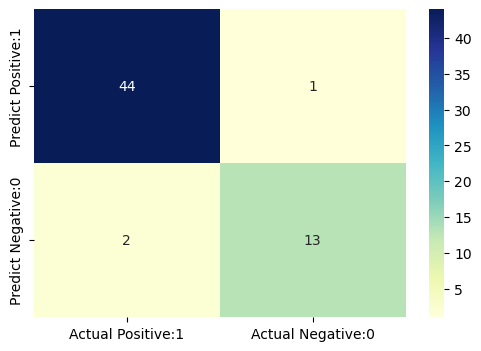

In [22]:
import matplotlib.pyplot as plt    # from matplotlib import pyplot as plt
%matplotlib inline

# visualize confusion matrix with seaborn heatmap
import seaborn as sns
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# The equation of curve hence is :-

# y = 1/(1+e^(-0.1723x + 7.3265))

# where y is Probability of Event to Happen and x is AGE (training set)

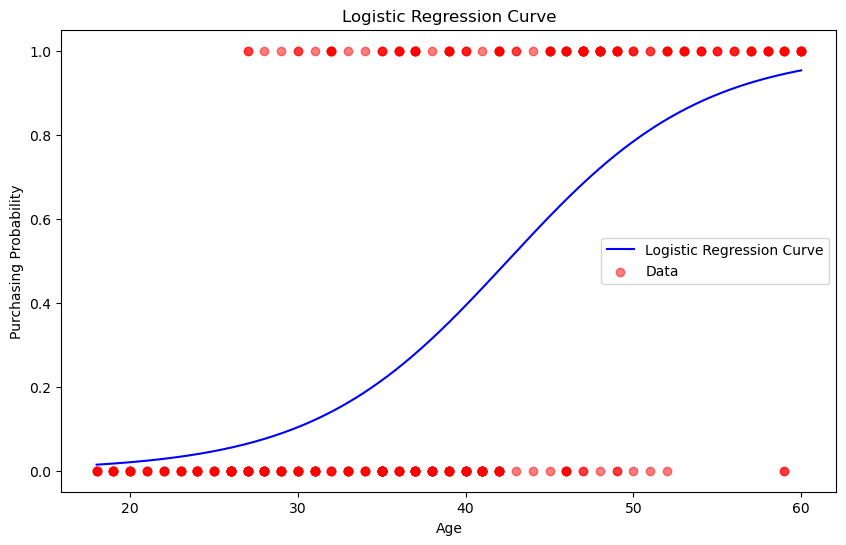

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Generate age values for plotting
age_values = np.linspace(min(x), max(x), 1000).reshape(-1, 1)

# Calculate the predicted probabilities using the sigmoid function
probabilities = 1 / (1 + np.exp(-m * age_values - c))

# Plot the curve
plt.figure(figsize=(10, 6))
plt.plot(age_values, probabilities, color='blue', label='Logistic Regression Curve')
plt.scatter(x, y, color='red', label='Data', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Purchasing Probability')
plt.title('Logistic Regression Curve')
plt.legend()
plt.show()

# Predict the set of values on x_test and x_train and store in corresponding variables

In [24]:
y_pred_test = lr.predict(x_test)
y_pred_train = lr.predict(x_train)

# To just check the prediction algorithm we see what the PURCHASED values are based on dataset value and predicted value

In [25]:
y_new = lr.predict(np.array([[30]]))
y_new

array([0], dtype=int64)

In [26]:
# Assuming x is your NumPy array and y is your NumPy array
value_to_check = 30

# Find the index where x equals the specified value
i = np.where(x == value_to_check)[0]
corresponding_y = y[i[0]]

# Check if there is any matching index
print(f'The corresponding y value for x = {value_to_check} is: {corresponding_y}')

The corresponding y value for x = 30 is: 0


# Final Interpretation 

The SUV purchase dataset which contains 400 rows and 5 columns is used for Logistic Regression model. The dataset is not used as a whole and only specific features are interlinked to the target values. We do require only categorical values in target variable. User ID column is discarded as we are not working on unique values and their prediction. Since no empty or null values are present in the dataset, and Correlation between one of the feature and target is 62 %, we consider only them for Logistic Regression model. Based on 85:15 validating split, Accuracy score is 95 %, relatively Precision score is 95.185 % and similarly for F1score and others. From the curve y = 1 / ( 1 + e ^ -(mx + c)), we get the value of slope, i.e., m = 0.1723 and value of intercept, i.e., c = -7.3265. We predict what class the testing dataset could belong to upon classification and what could the corresponding probability value be. We visualize the logistic regression curve based on Age and Purchase values. At last, we check what predicted class is predicted vs what is in the dataset. The model has quite a few uncertainities but still it is decent to predict the values.